## High Level Computer Vision 
### Exercise 3: Convolutional Neural Networks

**You may wirte your report in this `ipynb` file or submit the report as a PDF file.**

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In Exercise 3, you will implement a convolutional neural network to perform image classification and explore methods to improve the training performance and generalization of these networks.
We will use the CIFAR-10 dataset as a benchmark for our networks, similar to the previous exercise. This dataset consists of 50000 training images of 32x32 resolution with 10 object classes, namely airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. The task is to implement a convolutional network to classify these images using the PyTorch library. The four questions are,

- Implementing a convolutional neural network, training it, and visualizing its weights(Question 1).
- Experiment with batch normalization and early stopping (Question 2).
- Data augmentation and dropout to improve generalization (Question 3).
- Implement transfer learning from an ImageNet-pretrained model (Question 4).

### Question 1: Implement Convolutional Network (10 points)

In this question, we will implement a five-layered convolutional neural network architecture as well as the loss function to train it. Refer to the comments in the code to the exact places where you need to fill in the code.

<img src="./resources/fig1.png" width="700" align=left>

a) Our architecture is shown in Fig 1. It has five convolution blocks. Each block is consist of convolution, max pooling, and ReLU operation in that order. We will use 3×3 kernels in all convolutional layers. Set the padding and stride of the convolutional layers so that they maintain the spatial dimensions. Max pooling operations are done with 2×2 kernels, with a stride of 2, thereby halving the spatial resolution each time. Finally, five stacking these five blocks leads to a 512 × 1 × 1 feature map. Classification is achieved by a fully connected layer. We will train convolutional neural networks on the CIFAR-10 dataset. Implement a class ConvNet to define the model described. The ConvNet takes 32 × 32 color images as inputs and has 5 hidden layers with 128, 512, 512, 512, 512 filters, and produces a 10-class classification. The code to train the model is already provided. Train the above model and report the training and validation accuracies. (5 points)

b) Implement a function `PrintModelSize`, which calculates and prints the number of parameters of a neural network. `PrintModelSize` takes a model as input and returns the parameters of a model. This gives us a measure of model capacity. Report the number of parameters for the described model. (2 points)

<img src="./resources/fig2.png" width="600" align=left>

c) Implement a function `VisualizeFilter`, which visualizes the filters of the first convolution layer implemented in Q1.a. In other words, you need to show 128 filters with size 3x3 as color images (since each filter has three input channels). Stack these into 3x3 color images into one large image. You can use the `imshow` function from the `matplotlib` library to visualize the weights. See an example in Fig. 2 Compare the filters before and after training. Do you see any patterns? (3 points)

#### Wirte your report for Q1 in this cell.

<br>
<br>
<br>

### Question 2: Improve training of Convolutional Networks (10 points)

a) Batch normalization is a widely used operation in neural networks, which will increase the speed of convergence and reach higher performance. Read the paper “Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift” for more theoretical details.
In practice, these operations are implemented in the most popular toolbox, such as PyTorch and TensorFlow. Add batch normalization in the model of Q1.a. Please keep other hyperparameters the same, but only add batch normalization. The ConvNet with batch normalization still uses the same class with Q1.a but different arguments. Check the code for details. In each block, the computations are in the order of convolution, batch normalization, pooling, and ReLU. Compare the loss curves and accuracy using batch normalization to its counterpart in Q1.a. (5 points)

b) Early stopping is a method to alleviate overfitting. Instead of reporting the performance of the final model, early stopping also saves the best model on the validation set during training. Increase the training epochs to 50 in Q1.a and Q2.a, and compare the best model and latest model on the training set. Due to the randomness, you can train multiple times to verify and observe overfitting and early stopping. (5 points)

#### Wirte your report for Q2 in this cell.

<br>
<br>
<br>

### Question 3: Improve generalization of Convolutional Networks (10 points)

We saw in Q2 that the model can start over-fitting to the training set if we continue training for long. To prevent over-fitting, there are two main paradigms we can focus on. The first is to get more training data. This might be a difficult and expensive process involving significant. However, it is generally the most effective way to learn more general models. A cheaper alternative is to perform data augmentation. The second approach is to regularize the model. In the following sub-questions, we will experiment with each of these paradigms and measure the effect on the model generalization.

a) Data augmentation is the process of creating more training data by applying certain transformations to the training set images. Usually, the underlying assumption is that the label of the image does not change under the applied transformations. This includes geometric transformations like translation, rotation, scaling, flipping, random cropping, and color transformations like greyscale, colorjitter. For every image in the training batch, a random transformation is sampled from the possible ones (e.g., a random number of pixels to translate the image by) and is applied to the image. While designing the data input pipeline, we must choose the hyper-parameters for these transformations (e.g., limits of translation or rotation) based on things we expect to see in the test-set/real world. Your task in this question is to implement the data augmentation for the CIFAR-10 classification task. Many of these transformations are implemented in the `torchvision.transforms` package. Familiarize your- self with the APIs of these transforms, and functions to compose multiple transforms or randomly sample them. Next, implement geometric and color space data augmentations for the CIFAR-10 dataset, by choos- ing the right functions and order of application. Tune the hyper-parameters of these data augmentations to improve the validation performance. You will need to train the model a bit longer (20-30 epochs) with data augmentation, as the training data is effectively larger now. Discuss which augmentations work well for you in the report. (6 points)

b) Dropout is a popular scheme to regularize the model to improve generalization. The dropout layer works by setting the input activations randomly to zero at the output. You can implement Dropout by adding the `torch.nn.Dropout` layer between the conv blocks in your model. The layer has a single hyper-parameter $p$, which is the probability of dropping the input activations. High values of $p$ regularize the model heavily and decrease model capacity, but with low values, the model might overfit. Find the right hyper-parameter for $p$ by training the model for different values of $p$ and comparing training validation and validation accuracies. You can use the same parameter $p$ for all layers. You can also disable the data augmentation from the previous step while running this experiment, to clearly see the benefit of dropout. Show the plot of training and validation accuracies for different values of dropout (0.1 - 0.9) in the report. (4 points)

#### Wirte your report for Q3 in this cell.

<br>
<br>
<br>

In [2]:
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512, 512]
num_epochs = 20
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
norm_layer = None
use_dropout = False
dropout_value = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
p = 0.9
print(hidden_size)


#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
#################################################################################
# TODO: Q3.a Chose the right data augmentation transforms with the right        #
# hyper-parameters and put them in the data_aug_transforms variable             #
#################################################################################
data_aug_transforms = [
     #transforms.Resize((40, 40)),
     #transforms.RandomCrop((32, 32)),
     #transforms.RandomHorizontalFlip(),
     #transforms.RandomRotation(15),
     #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
     #torchvision.transforms.Grayscale(num_output_channels=3),
] 
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=test_transform
                                          )
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Using device: cuda
[128, 512, 512, 512, 512, 512]


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting datasets/cifar-10-python.tar.gz to datasets/


In [3]:
#-------------------------------------------------
# Convolutional neural network (Q1.a and Q2.a)
# Set norm_layer for different networks whether using batch normalization
#-------------------------------------------------
class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer,dropout, dropout_value):
        super(ConvNet, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the convolutional layer    #
        # described in the exercise.                                                    #
        # For Q1.a make use of conv2d and relu layers from the torch.nn module.         #
        # For Q2.a make use of BatchNorm2d layer from the torch.nn module.              #
        # For Q3.b Use Dropout layer from the torch.nn module.                          #
        #################################################################################
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if norm_layer == None:
          #From various references, considering the kernel size of 3x3 (over 1x1 or 4x4 filters) which is popular for better feature extraction
          #Size of padding is calculated using the formula: P = ((F-1)/2)
          #Can't experiment extensively with Stride/Filter/Pad in Conv and FC Layers as hidden layer sizes are fixed
            self.conv = nn.Sequential(
                        nn.Conv2d(input_size, hidden_size[0], kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),

                        nn.Conv2d(hidden_size[0], hidden_size[1], kernel_size = 3, stride=1, padding=1),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),

                        nn.Conv2d(hidden_size[1], hidden_size[2], kernel_size = 3, stride=1, padding=1),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),

                        nn.Conv2d(hidden_size[2], hidden_size[3], kernel_size = 3, stride=1, padding=1),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),

                        nn.Conv2d(hidden_size[3], hidden_size[4], kernel_size = 3, stride=1, padding=1),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU())
            self.fc = nn.Sequential(nn.Linear(hidden_size[5], num_classes))
            
        # Adding batch norm if batch norm flag is enabled  
        elif norm_layer != None and not dropout:
            self.conv = nn.Sequential(
                        nn.Conv2d(input_size, hidden_size[0], kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),
                        nn.BatchNorm2d(hidden_size[0]),  #Q2 needs batch-norm code, so i'm just experimenting this part
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),
                        
                        #Simillarly need to write batchnorm code for hidden_size: 1, 2, 3, 4
                        nn.Conv2d(hidden_size[0], hidden_size[1], kernel_size = 3, stride=1, padding=1),
                        nn.BatchNorm2d(hidden_size[1]),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),
                        
                        nn.Conv2d(hidden_size[1], hidden_size[2], kernel_size = 3, stride=1, padding=1),
                        nn.BatchNorm2d(hidden_size[2]),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),
                        
                        nn.Conv2d(hidden_size[2], hidden_size[3], kernel_size = 3, stride=1, padding=1),
                        nn.BatchNorm2d(hidden_size[3]),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),
                        
                        nn.Conv2d(hidden_size[3], hidden_size[4], kernel_size = 3, stride=1, padding=1),
                        nn.BatchNorm2d(hidden_size[4]),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU())
            self.fc = nn.Sequential(nn.Linear(hidden_size[5], num_classes))
        elif norm_layer != None and dropout:
            self.conv = nn.Sequential(
                        nn.Conv2d(input_size, hidden_size[0], kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),
                        nn.BatchNorm2d(hidden_size[0]),  #Q2 needs batch-norm code, so i'm just experimenting this part
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),
                        nn.Dropout(dropout_value),

                        #Simillarly need to write batchnorm code for hidden_size: 1, 2, 3, 4
                        nn.Conv2d(hidden_size[0], hidden_size[1], kernel_size = 3, stride=1, padding=1),
                        nn.BatchNorm2d(hidden_size[1]),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),
                        nn.Dropout(dropout_value),

                        nn.Conv2d(hidden_size[1], hidden_size[2], kernel_size = 3, stride=1, padding=1),
                        nn.BatchNorm2d(hidden_size[2]),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),
                        nn.Dropout(dropout_value),

                        nn.Conv2d(hidden_size[2], hidden_size[3], kernel_size = 3, stride=1, padding=1),
                        nn.BatchNorm2d(hidden_size[3]),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),
                        nn.Dropout(dropout_value),

                        nn.Conv2d(hidden_size[3], hidden_size[4], kernel_size = 3, stride=1, padding=1),
                        nn.BatchNorm2d(hidden_size[4]),
                        nn.MaxPool2d(kernel_size=2, stride=2), nn.ReLU(),
                        nn.Dropout(dropout_value))
          

            #1D Batch norm for final layer
            self.fc = nn.Sequential(nn.ReLU(), nn.Linear(hidden_size[5], num_classes))
            
        self.layers = [self.conv, self.fc]

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        x = self.conv(x)

        #Returns tensor x with all the dimensions of input of size 1 removed
        x = x.squeeze()

        #send the flattened input to fully connect layer
        out = self.fc(x)  #This o/p is then passed through softmax to retrieve probability distribution of classes
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [4]:
#-------------------------------------------------
# Calculate the model size (Q1.b)
# if disp is true, print the model parameters, otherwise, only return the number of parameters.
#-------------------------------------------------
def PrintModelSize(model, disp=True):
    #################################################################################
    # TODO: Implement the function to count the number of trainable parameters in   #
    # the input model. This useful to track the capacity of the model you are       #
    # training                                                                      #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    model_sz = num_params = sum(param.numel() for param in model.parameters() if param.requires_grad)
    
    if disp:
        parameters_count = 0
        for module, para in model.named_parameters():
            if not para.requires_grad: continue
            parameter = para.numel()
            parameters_count+=parameter
            print( module,": No. of parameters:",parameters_count)
    
    print(f"Total Trainable Params: {parameters_count}")
    
    #cite:https://discuss.pytorch.org/t/how-to-count-model-parameters/128505/2
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return model_sz

In [5]:
#-------------------------------------------------
# Calculate the model size (Q1.c)
# visualize the convolution filters of the first convolution layer of the input model
#-------------------------------------------------
def VisualizeFilter(model):
    #################################################################################
    # TODO: Implement the functiont to visualize the weights in the first conv layer#
    # in the model. Visualize them as a single image fo stacked filters.            #
    # You can use matlplotlib.imshow to visualize an image in python                #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    filters = model.layers[0][0].weight.data.cpu().numpy()  #convert tensor to cpu to np array
    print(filters)
    fig = plt.figure()
    fig_row = 8
    fig_col=16
    for idx in range(1, fig_row*fig_col + 1):
        sub_fig = fig.add_subplot(fig_row, fig_col, idx)
        sub_fig.axes.set_xticks([])
        sub_fig.axes.set_yticks([])
        plt.imshow((filters[idx-1, ...] - np.min(filters[idx-1]))/ (np.max(filters[idx-1] - np.min(filters[idx-1]))))
    plt.show()
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [6]:
#======================================================================================
# Q1.a: Implementing convolutional neural net in PyTorch
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------
model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer, dropout=use_dropout, dropout_value=p).to(device)
# Q2.a - Initialize the model with correct batch norm layer

model.apply(weights_init)
# Print the model
print(model)

ConvNet(
  (conv): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=Tr

In [7]:
# Print model size
#======================================================================================
# Q1.b: Implementing the function to count the number of trainable parameters in the model
#======================================================================================
PrintModelSize(model)

conv.0.weight : No. of parameters: 3456
conv.0.bias : No. of parameters: 3584
conv.3.weight : No. of parameters: 593408
conv.3.bias : No. of parameters: 593920
conv.6.weight : No. of parameters: 2953216
conv.6.bias : No. of parameters: 2953728
conv.9.weight : No. of parameters: 5313024
conv.9.bias : No. of parameters: 5313536
conv.12.weight : No. of parameters: 7672832
conv.12.bias : No. of parameters: 7673344
fc.0.weight : No. of parameters: 7678464
fc.0.bias : No. of parameters: 7678474
Total Trainable Params: 7678474


7678474

[[[[ 5.62992718e-05 -7.65876565e-03  1.02288894e-01]
   [ 4.52106558e-02  1.44498810e-01  5.70065230e-02]
   [ 3.90017219e-02 -3.60010900e-02  4.66272235e-03]]

  [[ 8.06491226e-02 -2.60531195e-02  1.30923912e-01]
   [ 1.62909716e-01 -8.33369642e-02 -6.48340955e-02]
   [ 2.43447777e-02  1.94255426e-03  1.58992454e-01]]

  [[ 5.84426597e-02  1.65878147e-01 -3.18095484e-03]
   [-6.51367679e-02 -9.83622819e-02 -1.08765006e-01]
   [ 1.17607433e-02 -6.95838556e-02  2.77256016e-02]]]


 [[[-5.11343777e-02 -1.90803051e-01  7.41591230e-02]
   [ 8.53088573e-02  4.57053520e-02  7.17510805e-02]
   [ 6.12457395e-02 -9.33552980e-02 -6.74625412e-02]]

  [[ 2.77917664e-02  1.39193878e-01  1.56172186e-01]
   [ 3.86477523e-02 -1.61991641e-01  7.10995346e-02]
   [-1.34893715e-01  1.10172676e-02 -3.77390049e-02]]

  [[ 1.33091897e-01  1.07025333e-01 -1.36652082e-01]
   [ 6.34823600e-03  1.05751827e-01  1.83943808e-01]
   [ 8.71144533e-02 -7.16976970e-02  5.41782081e-02]]]


 [[[ 1.56590179e-01  1.6048671

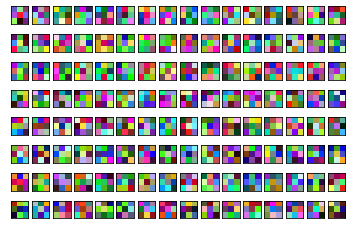

In [8]:
#======================================================================================
# Q1.c: Implementing the function to visualize the filters in the first conv layers.
# Visualize the filters before training
#======================================================================================
VisualizeFilter(model)

In [9]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
train_acc=[]
valid_acc=[]
loss_values=[]
best_accuracy=0
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_values.append(loss.cpu().detach().numpy())
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    train_acc.append(100 * correct / total)
    
    print("losss",loss.cpu().detach().numpy())
    print('Train accuracy is: {} %'.format(100 * correct / total))


    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        valid_acc.append(100 * correct / total)
        print('Validataion accuracy is: {} %'.format(100 * correct / total))
        #################################################################################
        # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
        # acheieved the best validation accuracy so-far.                                #
        #################################################################################
        best_model = None
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # cur_accuracy = 100 * correct / total
        
        # if epoch == 50:    
        #     torch.save(best_model.state_dict(),'./latest_model.ckpt')

        # if cur_accuracy > best_accuracy:
        #     best_accuracy = cur_accuracy
        #     best_model = model
        #     print("best")
        #     torch.save(best_model.state_dict(),'./best_model.ckpt')

        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    model.train()


Epoch [1/20], Step [100/245], Loss: 1.7773
Epoch [1/20], Step [200/245], Loss: 1.4373
losss 1.3519278
Train accuracy is: 40.75 %
Validataion accuracy is: 52.7 %
Epoch [2/20], Step [100/245], Loss: 1.2395
Epoch [2/20], Step [200/245], Loss: 1.2612
losss 0.9800933
Train accuracy is: 55.0 %
Validataion accuracy is: 63.4 %
Epoch [3/20], Step [100/245], Loss: 0.9179
Epoch [3/20], Step [200/245], Loss: 0.9656
losss 0.80641776
Train accuracy is: 66.25 %
Validataion accuracy is: 66.6 %
Epoch [4/20], Step [100/245], Loss: 0.6284
Epoch [4/20], Step [200/245], Loss: 0.7829
losss 0.76987267
Train accuracy is: 76.5 %
Validataion accuracy is: 69.5 %
Epoch [5/20], Step [100/245], Loss: 0.7502
Epoch [5/20], Step [200/245], Loss: 0.6907
losss 0.7922525
Train accuracy is: 75.0 %
Validataion accuracy is: 75.3 %
Epoch [6/20], Step [100/245], Loss: 0.5794
Epoch [6/20], Step [200/245], Loss: 0.5736
losss 0.6739025
Train accuracy is: 81.25 %
Validataion accuracy is: 76.2 %
Epoch [7/20], Step [100/245], Loss:

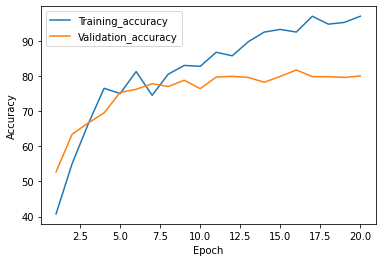

In [10]:
#Plotting training and validation accuracies
epochs_size=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.plot(epochs_size,train_acc,label = "Training_accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(epochs_size,valid_acc,label = "Validation_accuracy")
plt.legend()
plt.show()

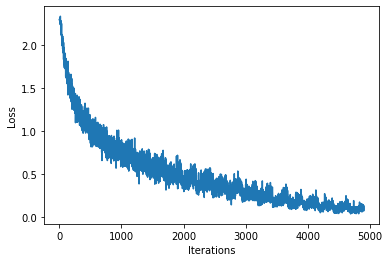

In [11]:
#Plotting loss accuracies
array = [x for x in range(1,4901)]
plt.plot(array,loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Accuracy of the network on the 1000 test images: 79.1 %
[[[[-0.03859356 -0.05683724 -0.01224402]
   [ 0.0179953   0.07115224  0.03296461]
   [ 0.03858906  0.02091413  0.01203705]]

  [[ 0.0034931  -0.03026344  0.0371821 ]
   [ 0.05860023 -0.01810647 -0.01606528]
   [-0.00259706  0.01681638  0.04867673]]

  [[ 0.04757538  0.10972019  0.01853993]
   [-0.04097894 -0.04460019 -0.0583571 ]
   [ 0.00711927 -0.02135343 -0.01814117]]]


 [[[-0.03725517 -0.00417683  0.14368539]
   [-0.09147663 -0.10829937  0.22248016]
   [-0.03486783 -0.30083734 -0.00412358]]

  [[-0.00943614  0.17789143  0.21058132]
   [-0.10564723 -0.14670095  0.26213914]
   [-0.13950753 -0.25646976 -0.00927943]]

  [[ 0.04523188  0.11342471 -0.00495113]
   [-0.08850708 -0.0082248   0.27877602]
   [-0.01655749 -0.21709277  0.03287083]]]


 [[[ 0.19373597  0.19181694  0.04603275]
   [-0.02489831  0.09846321  0.03250272]
   [-0.15570603 -0.12301263 -0.17197081]]

  [[-0.05721523  0.07241368  0.07977782]
   [ 0.02169296  0.09023

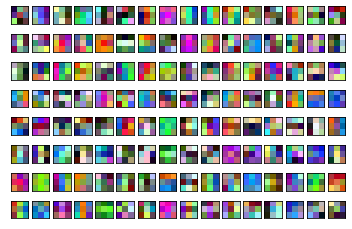

In [12]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
model.eval()
#################################################################################
# TODO: Q2.b Implement the early stopping mechanism to load the weights from the#
# best model so far and perform testing with this model.                        #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# model.load_state_dict(torch.load('./latest_model.ckpt'))
# model.eval()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

# Q1.c: Implementing the function to visualize the filters in the first conv layers.
# Visualize the filters before training
VisualizeFilter(model)
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

### Question 4: Use pretrained networks (10 points)

It has become standard practice in computer vision tasks related to images to use a convolutional network pre-trained as the backbone feature extraction network and train new layers on top for the target task. In this question, we will implement such a model. We will use the `VGG_11_bn` network from the `torchvision.models` library as our backbone network. This model has been trained on ImageNet, achieving a top-5 error rate of 10.19%. It consists of 8 convolutional layers followed by adaptive average pooling and fully-connected layers to perform the classification. We will get rid of the average pooling and fully-connected layers from the `VGG_11_bn` model and attach our own fully connected layers to perform the CIFAR-10 classification.

a) Instantiate a pretrained version of the `VGG_11_bn` model with ImageNet pre-trained weights. Add two fully connected layers on top, with Batch Norm and ReLU layers in between them, to build the CIFAR-10 10-class classifier. Note that you will need to set the correct mean and variance in the data-loader, to match the mean and variance the data was normalized with when the `VGG_11_bn` was trained. Train only the newly added layers while disabling gradients for the rest of the network. Each parameter in PyTorch has a required grad flag, which can be turned off to disable gradient computation for it. Get familiar with this gradient control mechanism in PyTorch and train the above model. As a reference point, you will see validation accuracies in the range (61-65%) if implemented correctly. (6 points)

b) We can see that while the ImageNet features are useful, just learning the new layers does not yield better performance than training our own network from scratch. This is due to the domain-shift between the ImageNet dataset (224x224 resolution images) and the CIFAR-10 dataset (32x32 images). To improve the performance we can fine-tune the whole network on the CIFAR-10 dataset, starting from the ImageNet initialization. To do this, enable gradient computation to the rest of the network, and update all the model parameters. Additionally train a baseline model where the same entire network is trained from scratch, without loading the ImageNet weights. Compare the two models' training curves, validation, and testing performance in the report. (4 points)

#### Wirte your report for Q4 in this cell.

For part a, we have used a pretrained ``VGG_11_bn`` model. Last classification layers are removed from orignal model and two FCL are added with final output size 10. Each parameter of model has an attribute ``.requires_grad``. Setting to True means that its prelearnt weight will be updated during training, otherwise it will remain unchanged.
In our code, fine_tune is the variable that decides whether to tune all the layers by setting ``fine_tune=True``, or only learn the last layers by setting ``fine_tune=False``.

As it can be seen in fig below, when we only fine tuned the model, only last two FCL are retrained that has total 4 parameters.
<img src="resources/2.png" alt="Model 1 paramters to be trained" width="300"/>



In part 4b, to show the efficeny that the idea of finetuning adds, we have loaded a VGG model from scratch.
A comparision is done between three possible models:
<blockquote>
    <p>Model 1 : Only new layers are trained</p>
    <p>Model 2 : Complete model is fined tuned</p>
    <p>Model 3 : Scratch model</p>
        
</blockquote>

For comparision, validation accuracies are noted upto 5th epoch (due to lack of memory and powerful system).
<img src="resources/accuracies.png" alt="Accuracies per epoch" width="500"/>
#### Model 1
<img src="resources/model1_stats.png" alt="Model 1 epoch stats" width="250"/>

#### Model 2
<img src="resources/model2_stats.png" alt="Model 2 epoch stats" width="250"/>

#### Model 3
<img src="resources/model3_stats.png" alt="Model 3 epoch stats" width="250"/>

In [13]:
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 32 * 32 * 3
layer_config= [512, 256]
num_classes = 10
num_epochs = 30
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.99
reg=0#0.001
num_training= 49000
num_validation =1000
fine_tune = False
pretrained=True

data_aug_transforms = [transforms.RandomHorizontalFlip(p=0.5)]#, transforms.RandomGrayscale(p=0.05)]
#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
# Q1,
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=False)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=norm_transform
                                          )
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

Using device: cuda


In [14]:
class VggModel(nn.Module):
    def __init__(self, n_class, fine_tune, pretrained=True):
        super(VggModel, self).__init__()
        #################################################################################
        # TODO: Build the classification network described in Q4 using the              #
        # models.vgg11_bn network from torchvision model zoo as the feature extraction  #
        # layers and two linear layers on top for classification. You can load the      #
        # pretrained ImageNet weights based on the pretrained flag. You can enable and  #
        # disable training the feature extraction layers based on the fine_tune flag.   #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        vgg = torchvision.models.vgg11_bn(pretrained)
        # print("\nOriginal VGG model:\n")
        # print(vgg)
#         c=0
#         for name,param in vgg.named_parameters():
#             if param.requires_grad == True:
# #                 print("\t",name)
#                 c+=1
#         print("total learnable params in orignal model: "+str(c))
        
        set_parameter_requires_grad(vgg, not fine_tune)
        del vgg.avgpool
        del vgg.classifier
        vgg.classifier = nn.Sequential(torch.nn.Linear(512,512,True),torch.nn.ReLU(True),torch.nn.Linear(512,num_classes,True))

#         print("\n\nUpdated Model\n")
#         print(vgg)
#         d=0
#         c=0
#         print('\nParams that are to be learnt when fine_tine is set to {}\n'.format(fine_tune))  
#         for name,param in vgg.named_parameters():
#             if param.requires_grad == True:
#                 print("\t",name)
#                 c+=1
#             d+=1
#         print('\nTotal params : {}\nTotal learnable params when fine_tine is set to {} : {}\n \n'.format(d,fine_tune,c))  
        self.model=vgg
        self.features=vgg.features
        self.classifier=vgg.classifier
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        x = self.features(x)
        x = torch.flatten(x, 1)
        out = self.classifier(x)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

# Initialize the model for this run
model= VggModel(num_classes, fine_tune, pretrained)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

In [15]:
# Print the model we just instantiated
print(model)

#################################################################################
# TODO: Only select the required parameters to pass to the optimizer. No need to#
# update parameters which should be held fixed (conv layers).                   #
#################################################################################
print("Params to learn:")
if fine_tune:
    params_to_update = []
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    for name,param in model.named_parameters():
      if param.requires_grad == True:
          params_to_update.append(param)
          print("\t",name)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
else:
    params_to_update = model.parameters()
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)


model=model.to(device)

VggModel(
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [16]:

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params_to_update, lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
best_accuracy=0
val_acc_history=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        #################################################################################
        # TODO: Q2.b Use the early stopping mechanism from previous questions to save   #
        # the model which has acheieved the best validation accuracy so-far.            #
        #################################################################################
        best_model = None
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        cur_accuracy = 100 * correct / total
        val_acc_history.append(cur_accuracy)
        if cur_accuracy > best_accuracy:
            best_accuracy = cur_accuracy
            best_model = model
            print("best")
            torch.save(best_model.state_dict(),'./best_model_1.ckpt')
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


        print('Validataion accuracy is: {} %'.format(100 * correct / total))

Epoch [1/30], Step [100/245], Loss: 1.2352
Epoch [1/30], Step [200/245], Loss: 1.1828
best
Validataion accuracy is: 59.7 %
Epoch [2/30], Step [100/245], Loss: 1.0504
Epoch [2/30], Step [200/245], Loss: 1.1295
best
Validataion accuracy is: 61.1 %
Epoch [3/30], Step [100/245], Loss: 0.9927
Epoch [3/30], Step [200/245], Loss: 0.9785
best
Validataion accuracy is: 62.4 %
Epoch [4/30], Step [100/245], Loss: 0.9861
Epoch [4/30], Step [200/245], Loss: 0.9434
Validataion accuracy is: 61.3 %
Epoch [5/30], Step [100/245], Loss: 1.0161
Epoch [5/30], Step [200/245], Loss: 1.0380
best
Validataion accuracy is: 63.7 %
Epoch [6/30], Step [100/245], Loss: 0.9832
Epoch [6/30], Step [200/245], Loss: 0.9567
best
Validataion accuracy is: 64.3 %
Epoch [7/30], Step [100/245], Loss: 0.9235
Epoch [7/30], Step [200/245], Loss: 0.8449
best
Validataion accuracy is: 65.7 %
Epoch [8/30], Step [100/245], Loss: 0.8200
Epoch [8/30], Step [200/245], Loss: 0.9029
Validataion accuracy is: 64.4 %
Epoch [9/30], Step [100/24

In [17]:
#################################################################################
# TODO: Use the early stopping mechanism from previous question to load the     #
# weights from the best model so far and perform testing with this model.       #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
model.load_state_dict(torch.load('./best_model_1.ckpt'))
model.eval()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model_1.ckpt')

Accuracy of the network on the 1000 test images: 64.4 %
